#### Importing the Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import warnings
%matplotlib inline

In [2]:
Dataset = pd.read_csv("Electricity Consumption.csv")

In [3]:
Dataset.head()

,DATE,Electricty_Consumption_in_TW
0,1/1/1973,35.9728
1,2/1/1973,36.1334
2,3/1/1973,35.0625
3,4/1/1973,33.8416
4,5/1/1973,33.5107


In [4]:
Dataset.tail()

,DATE,Electricty_Consumption_in_TW
556,5/1/2019,97.5860
557,6/1/2019,110.8580
558,7/1/2019,122.1014
559,8/1/2019,121.7765
560,9/1/2019,109.7190


In [5]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   DATE                          561 non-null    object 
 1   Electricty_Consumption_in_TW  561 non-null    float64
dtypes: float64(1), object(1)
memory usage: 8.9+ KB


In [6]:
Dataset.isnull().sum()

DATE                            0
Electricty_Consumption_in_TW    0
dtype: int64

In [7]:
Dataset['DATE'] = pd.to_datetime(Dataset['DATE'])

In [8]:
Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 561 entries, 0 to 560
Data columns (total 2 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   DATE                          561 non-null    datetime64[ns]
 1   Electricty_Consumption_in_TW  561 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 8.9 KB


In [9]:
Dataset.set_index('DATE',inplace=True)

In [10]:
Dataset.head()

,Electricty_Consumption_in_TW
DATE,
1973-01-01,35.9728
1973-02-01,36.1334
1973-03-01,35.0625
1973-04-01,33.8416
1973-05-01,33.5107


In [11]:
Sample_copy = Dataset.copy()

<Axes: xlabel='DATE'>

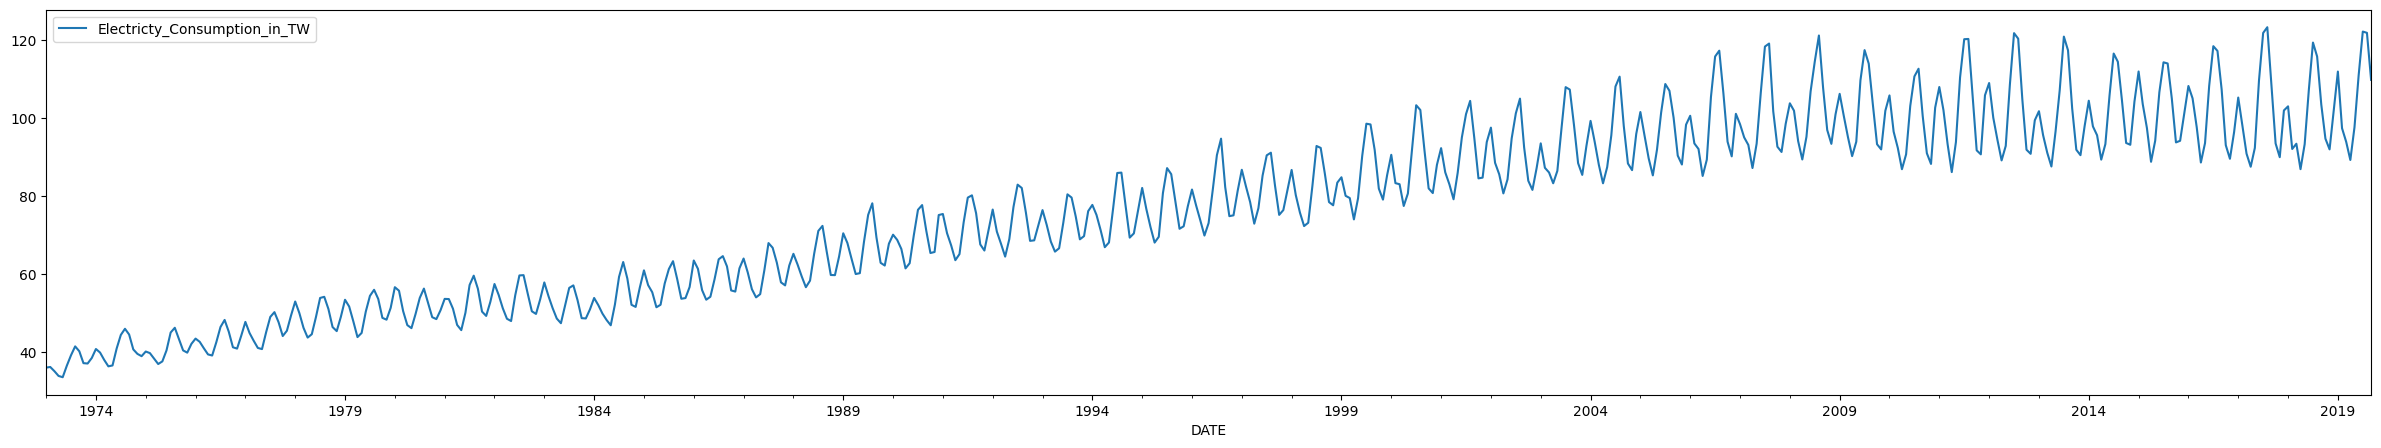

In [12]:
Dataset.plot(figsize = (30,5))

In [12]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Perform seasonal decomposition using the statsmodels library
result = seasonal_decompose(Dataset, model='additive')

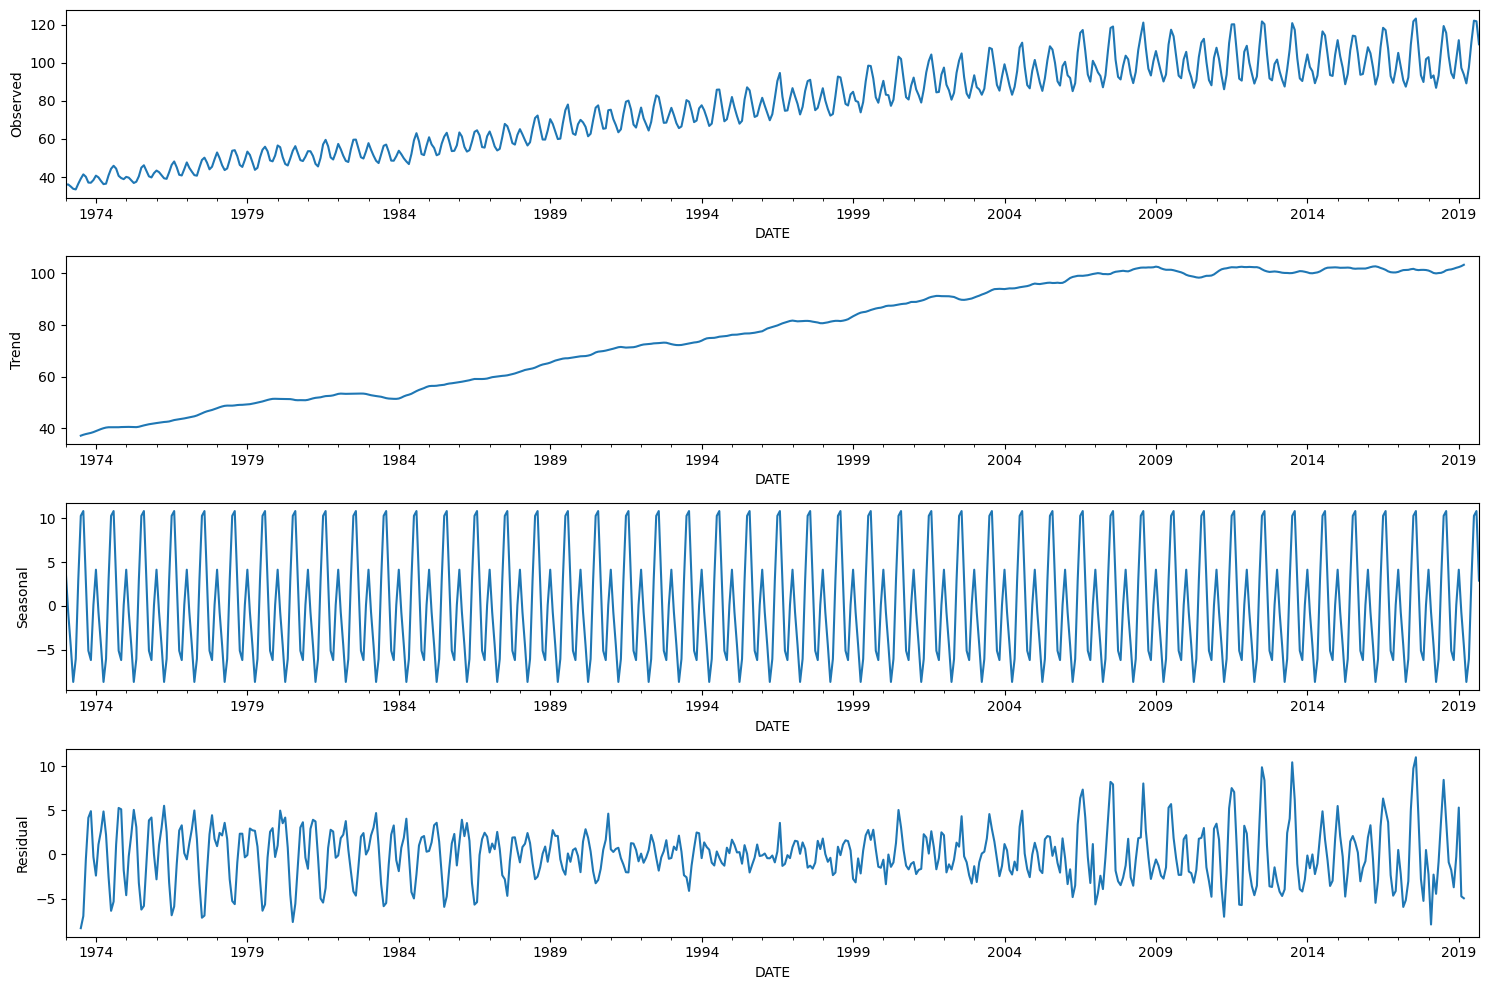

In [14]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(15, 10))
result.observed.plot(ax=ax1)
ax1.set_ylabel('Observed')
result.trend.plot(ax=ax2)
ax2.set_ylabel('Trend')
result.seasonal.plot(ax=ax3)
ax3.set_ylabel('Seasonal')
result.resid.plot(ax=ax4)
ax4.set_ylabel('Residual')
plt.tight_layout()
plt.show()

In [15]:
#Testing for Stationarity
from statsmodels.tsa.stattools import adfuller

In [16]:
#Ho: It is non stationary
#H1: It is stationary
def adfuller_test(x):
    result=adfuller(x)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [17]:
adfuller_test(Dataset['Electricty_Consumption_in_TW'])

ADF Test Statistic : -1.7405933729832443
p-value : 0.41032816044686793
#Lags Used : 15
Number of Observations Used : 545
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


#### Differencing

In [18]:
## 1 month shift
# Use Techniques Differencing
Dataset['Electricty_Consumption_in_TW_First_Difference'] = Dataset['Electricty_Consumption_in_TW'] - Dataset['Electricty_Consumption_in_TW'].shift(1)

In [19]:
## 12 months 
# Use Techniques Differencing
Dataset['Seasonal First Difference']= Dataset['Electricty_Consumption_in_TW']-Dataset['Electricty_Consumption_in_TW'].shift(12)

In [20]:
adfuller_test(Dataset['Seasonal First Difference'].dropna())

ADF Test Statistic : -6.283726159436481
p-value : 3.741990175521953e-08
#Lags Used : 12
Number of Observations Used : 536
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [21]:
adfuller_test(Dataset['Electricty_Consumption_in_TW_First_Difference'].dropna())

ADF Test Statistic : -7.941665363981184
p-value : 3.3013438021514486e-12
#Lags Used : 14
Number of Observations Used : 545
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary


In [22]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

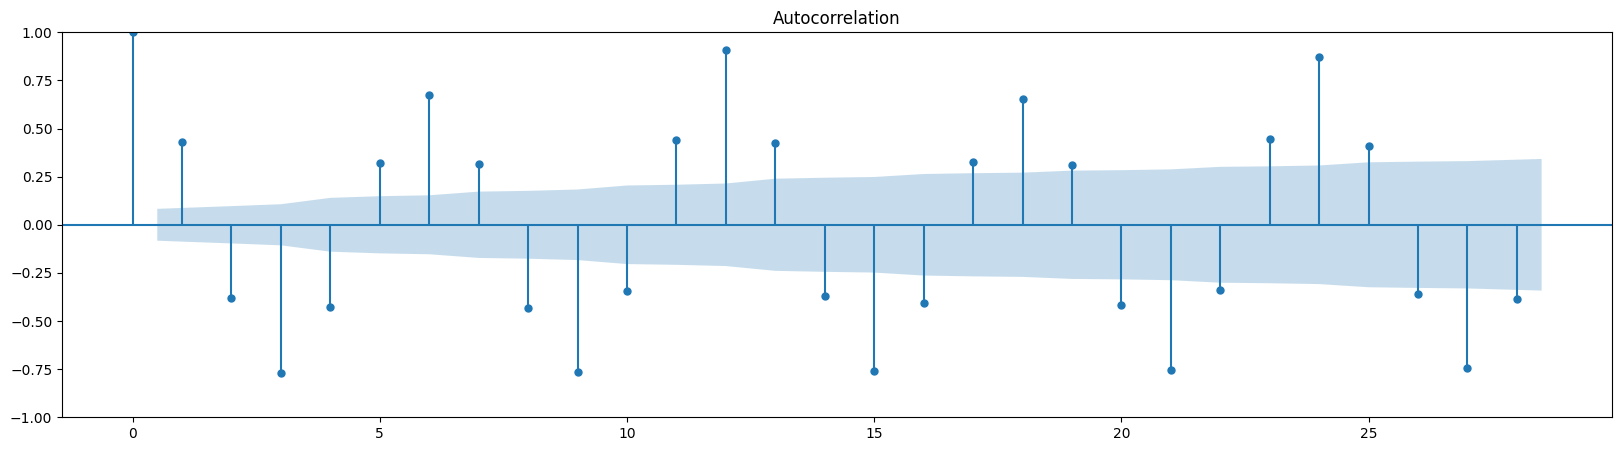

In [23]:
fig, ax = plt.subplots(figsize=(20, 5))
acf = plot_acf(Dataset['Electricty_Consumption_in_TW_First_Difference'].dropna(), ax=ax)
plt.show()

C:\Users\shubh\anaconda3\envs\tf_env\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


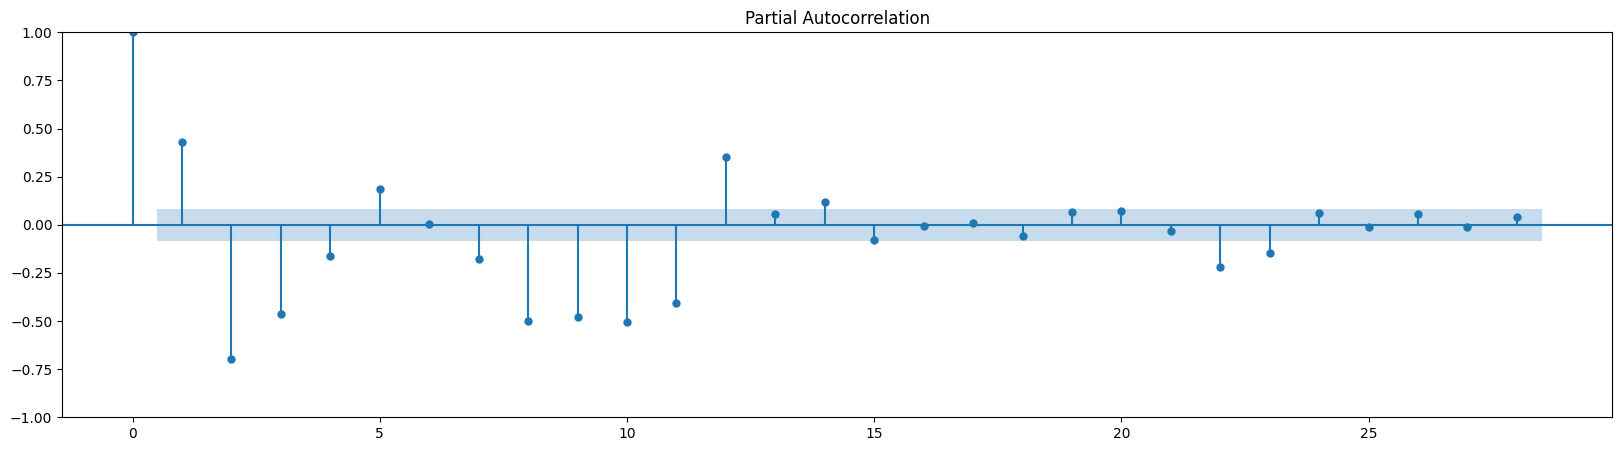

In [24]:
fig, ax = plt.subplots(figsize=(20, 5))
result = plot_pacf(Dataset['Electricty_Consumption_in_TW_First_Difference'].dropna(), ax=ax)


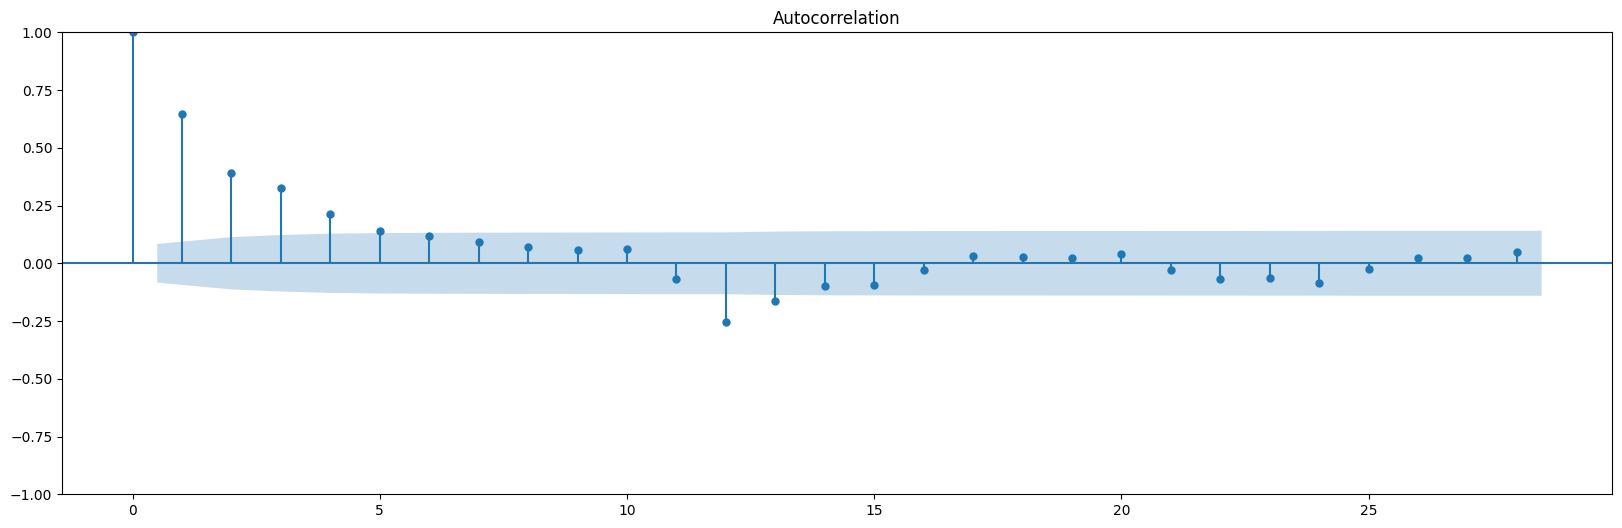

In [25]:
fig, ax = plt.subplots(figsize=(20, 6))
acf12 = plot_acf(Dataset['Seasonal First Difference'].dropna(),ax=ax)

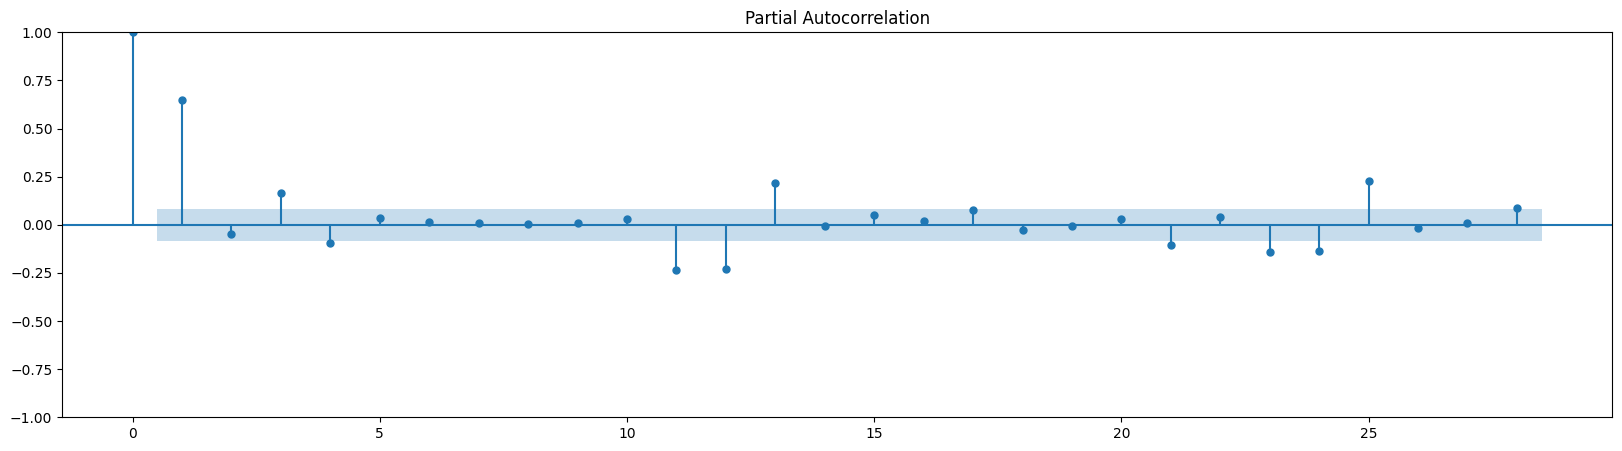

In [26]:
fig, ax = plt.subplots(figsize=(20, 5))
pacf12 = plot_pacf(Dataset['Seasonal First Difference'].dropna(),ax=ax)

In [27]:
import statsmodels.api as sm

In [28]:
model = sm.tsa.statespace.SARIMAX(    Dataset['Electricty_Consumption_in_TW'],
                                      order=(1, 1, 1),
                                      seasonal_order=(1, 1, 1, 12),
                                      enforce_stationarity=False,
                                      enforce_invertibility=False).fit()

C:\Users\shubh\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\shubh\anaconda3\envs\tf_env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [29]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:       Electricty_Consumption_in_TW   No. Observations:                  561
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1081.069
Date:                            Fri, 24 Feb 2023   AIC                           2172.139
Time:                                    21:44:23   BIC                           2193.541
Sample:                                01-01-1973   HQIC                          2180.513
                                     - 09-01-2019                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6072      0.039     15.769      0.000       0.532       0.683
ma.L1         -0.9395      0.019   

In [30]:
pred = model.fittedvalues['2019-01-01':]

In [31]:
actual =  Dataset['Electricty_Consumption_in_TW']['2019-01-01':]

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(actual,pred)

# Root Mean Squared Error (RMSE)
rmse = mean_squared_error(actual, pred, squared=False)

# Coefficient of Determination (R-squared)
r2 = r2_score(actual,pred)

# Print the metrics
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)
print("Coefficient of Determination (R-squared):", r2)

Mean Absolute Error (MAE): 2.1291685521729593
Root Mean Squared Error (RMSE): 2.7765631715368944
Coefficient of Determination (R-squared): 0.9399988408559524


In [33]:
Data = pd.concat([actual,pred],axis=1)
Data.columns = ['Actual_Values','Predicted_Values']
Data

,Actual_Values,Predicted_Values
DATE,,
2019-01-01,111.8520,106.457454
2019-02-01,97.3261,101.978925
2019-03-01,93.8406,93.704847
2019-04-01,89.1873,87.774622
2019-05-01,97.5860,94.324519
2019-06-01,110.8580,110.633381
2019-07-01,122.1014,121.138833
2019-08-01,121.7765,119.948801
2019-09-01,109.7190,108.428651


<Axes: xlabel='DATE'>

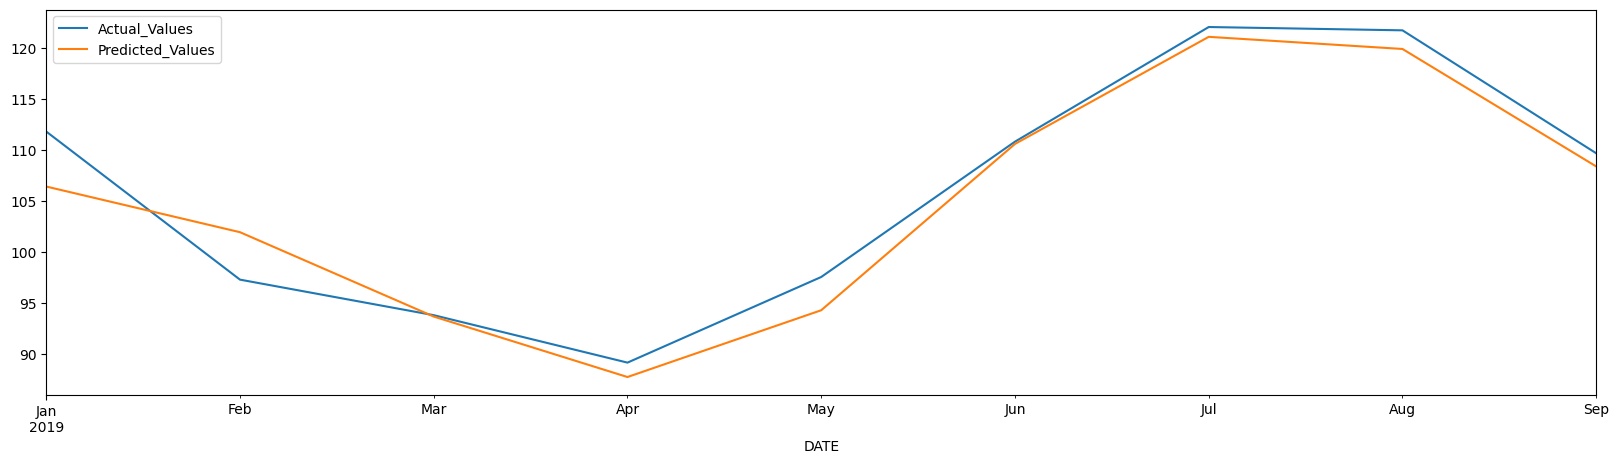

In [34]:
Data.plot(figsize=(20,5))

In [35]:
Data1 = Dataset.copy()

<Axes: xlabel='DATE'>

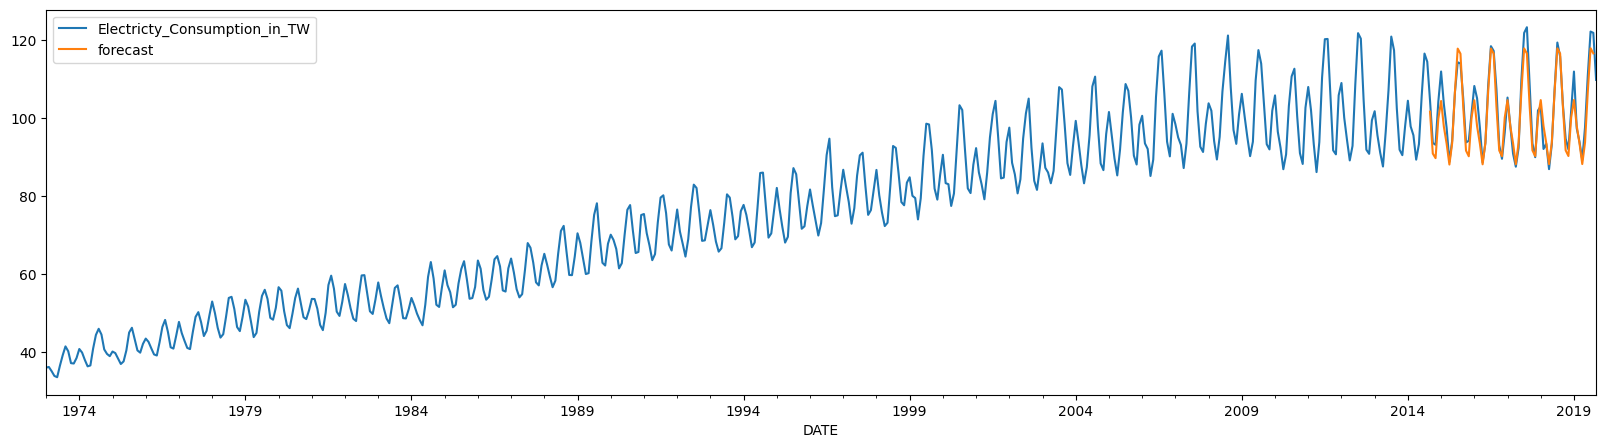

In [36]:
Data1['forecast'] = model.predict(start = 500, end = 559, dynamic=True)
Data1[['Electricty_Consumption_in_TW','forecast']].plot(figsize=(20,5))

In [37]:
Sample_copy.shape

(561, 1)

#### forcasting for next 24 months ( 2years )

In [38]:
from pandas.tseries.offsets import DateOffset
future_dates = [Sample_copy.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [39]:
forecasting_next_24months = pd.DataFrame(index = future_dates[1:],columns = Sample_copy.columns)

In [40]:
forecast_df = pd.concat([Sample_copy,forecasting_next_24months])
forecast_df.shape

(584, 1)

<Axes: >

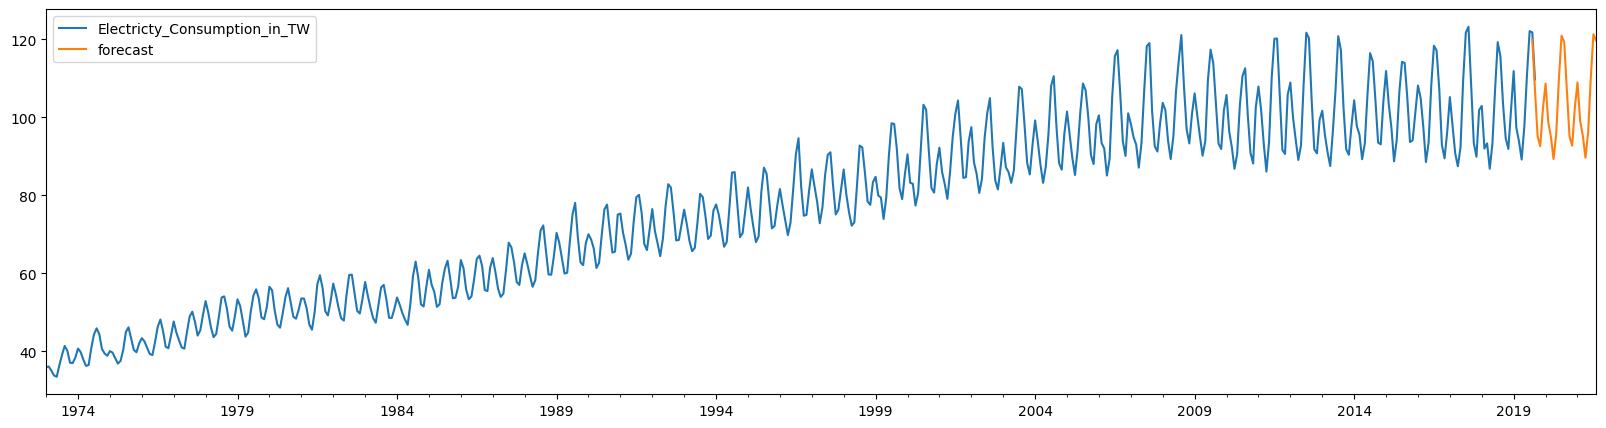

In [41]:
forecast_df['forecast'] = model.predict(start = 559, end = 584, dynamic=True)
forecast_df[['Electricty_Consumption_in_TW','forecast']].plot(figsize=(20,5))

In [42]:
forecast_df.tail(24)

,Electricty_Consumption_in_TW,forecast
2019-09-01,109.719,107.208237
2019-10-01,NaN,95.146545
2019-11-01,NaN,92.612748
2019-12-01,NaN,102.222361
2020-01-01,NaN,108.661016
2020-02-01,NaN,98.820269
2020-03-01,NaN,95.043202
2020-04-01,NaN,89.318517
2020-05-01,NaN,95.720557
2020-06-01,NaN,109.756189
